<a href="https://colab.research.google.com/github/Shubham-droid24/Capstone-Project-3-Classification/blob/main/Cardio_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

import math
import datetime as dt
from scipy.stats import *

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.tree import export_graphviz

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Mount the Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
cardio_risk_df=pd.read_csv('/content/drive/MyDrive/Files/data_cardiovascular_risk.csv')

### Dataset First View

In [4]:
# Dataset First Look
# First Five Rows
cardio_risk_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
# Last Five Rows
cardio_risk_df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
cardio_risk_df.shape

(3390, 17)

### Dataset Information

In [7]:
# Dataset Info
cardio_risk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(cardio_risk_df[cardio_risk_df.duplicated()])

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
cardio_risk_df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

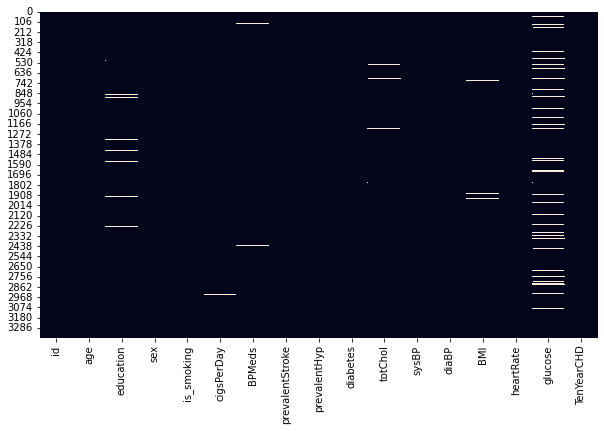

In [10]:
# Visualizing the missing values
plt.rcParams['figure.figsize'] = (10, 6)
sns.heatmap(cardio_risk_df.isnull(),cbar=False)

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
list(cardio_risk_df.columns)

['id',
 'age',
 'education',
 'sex',
 'is_smoking',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

In [12]:
# Dataset Describe
cardio_risk_df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description 

There are 17 variables which are described as follows:

1) **Id** : Patient's id

### **Demographic Variables** :

2) **Age** : Age of the patient(Continuous)

3) **Sex** : Male or female("M" or "F")(Nominal)

4) **Education** : No information provided(categories : 1,2,3,4)

### **Behavorial Variables** :

5) **Is_smoking** : Whether the patient is a current smoker or not(1 : "YES" or 0 : "NO")(Nominal)

6) **Cigs Per Day** : The number of cigarettes that the person smoked on average in one day.(Continuous)

### **Medical History** :

7) **BP Meds** : whether the patient was on blood pressure medication or not(1 : "YES" or 0 : "NO")(Nominal)

8) **Prevalent Stroke** : whether the patient had previously had a stroke or not(1 : "YES" or 0 : "NO")(Nominal)

9) **Prevalent Hyp** : whether the patient was hypertensive or not(1 : "YES" or 0 : "NO") (Nominal)

10) **Diabetes** : whether the patient had diabetes or not(1 : "YES" or 0 : "NO")(Nominal)

### **Current Medical Condition** :

11) **Tot Chol** : total cholesterol level (Continuous)

12) **Sys BP** : systolic blood pressure (Continuous)

13) **Dia BP** : diastolic blood pressure (Continuous)

14) **BMI** : Body Mass Index (Continuous)

15) **Heart Rate** : heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)

16) **Glucose** : glucose level (Continuous)

### **Target Variable** :

17) **TenYearCHD** : 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)


### Check Unique Values for each variable.

In [13]:
# Check No. of Unique Values for each variable
for i in list(cardio_risk_df.columns.difference(['id'])):
  print(f'No. of unique values in {i} is {cardio_risk_df[i].nunique()}')

No. of unique values in BMI is 1259
No. of unique values in BPMeds is 2
No. of unique values in TenYearCHD is 2
No. of unique values in age is 39
No. of unique values in cigsPerDay is 32
No. of unique values in diaBP is 142
No. of unique values in diabetes is 2
No. of unique values in education is 4
No. of unique values in glucose is 132
No. of unique values in heartRate is 68
No. of unique values in is_smoking is 2
No. of unique values in prevalentHyp is 2
No. of unique values in prevalentStroke is 2
No. of unique values in sex is 2
No. of unique values in sysBP is 226
No. of unique values in totChol is 240


In [14]:
# Check Unique Values for each variable
for i in list(cardio_risk_df.columns.difference(['id'])):
  print(f'Unique values in {i} is {cardio_risk_df[i].unique()}\n')

Unique values in BMI is [  nan 29.77 20.35 ... 29.19 19.71 31.09]

Unique values in BPMeds is [ 0. nan  1.]

Unique values in TenYearCHD is [1 0]

Unique values in age is [64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]

Unique values in cigsPerDay is [ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]

Unique values in diaBP is [ 85.   98.   71.   88.  121.  136.   68.   78.   81.   86.5  62.   97.
 120.   89.  105.   93.   91.   92.   86.   73.   70.   74.5  84.   80.
  82.   70.5  74.   63.   65.   76.   64.  106.   75.5  79.5  89.5  83.
  94.   97.5  75.   57.   90.   87.  103.   96.  104.   82.5  80.5  66.5
 100.   72.   99.   67.5  77.5  85.5  95.   79.   77.   69.   72.5  73.5
 101.5  62.5  96.5  68.5 102.  122.5 114.   60.   84.5 124.  100.5  59.
  88.5 108.   66.   67.   95.5 107.   78.5 101.   92.5  81.5  91.5  98.5
  93.5 1

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.
# Making a copy of the dataset cardio_risk_df for data wrangling
cardio_df = cardio_risk_df.copy() 

In [16]:
def heartRate(row):
    if row < 60: # 60 BPM (Beats Per Minute)
        value = 'Low' # Low Heart Rate
    elif row < 100: # 100 BPM (Beats Per Minute)
        value = 'Normal' # Normal Heart Rate
    else:
        value = 'High' # High Heart Rate
    
    return value


cardio_df['heartRateLabel'] = cardio_df['heartRate'].apply(heartRate)

cardio_df.drop(['heartRate'],axis=1,inplace= True)

In [17]:
def BMI(row):
    if row < 18.5: # BMI = 18.5
        bmi = 'Underwt' # Under Weight
    elif row < 25: # BMI = 25
        bmi = 'Healthywt' # Healthy Weight
    elif row < 30: # BMI = 30
        bmi = 'Overwt' # Over Weight
    else:
      bmi = 'Obese' # Obesity
    
    return bmi


cardio_df['BMILabel'] = cardio_df['BMI'].apply(BMI)

cardio_df.drop(['BMI'],axis=1,inplace= True)

In [18]:
cardio_df['TenYearCHD'].value_counts()/len(cardio_df)

0    0.849263
1    0.150737
Name: TenYearCHD, dtype: float64

In [19]:
cardio_df['age'].value_counts().reset_index().sort_values(by='index',ascending=True).head()

,index,age
38,32,1
36,33,4
33,34,16
32,35,29
27,36,75


In [20]:
cardio_df['is_smoking'].unique()

array(['YES', 'NO'], dtype=object)

In [21]:
cardio_df['is_smoking'].value_counts()

NO     1703
YES    1687
Name: is_smoking, dtype: int64

In [22]:
cardio_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,glucose,TenYearCHD,heartRateLabel,BMILabel
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,80.0,1,Normal,Obese
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,75.0,0,Normal,Overwt
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,94.0,0,Normal,Healthywt
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,94.0,1,Normal,Overwt
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,77.0,0,Normal,Overwt


In [23]:
# Target variable should be the last column
columns=list(cardio_df.columns)
columns.remove('TenYearCHD')
columns.append('TenYearCHD')
cardio_df=cardio_df[columns]
cardio_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,glucose,heartRateLabel,BMILabel,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,80.0,Normal,Obese,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,75.0,Normal,Overwt,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,94.0,Normal,Healthywt,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,94.0,Normal,Overwt,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,77.0,Normal,Overwt,0


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
cardio_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,glucose,heartRateLabel,BMILabel,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,80.0,Normal,Obese,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,75.0,Normal,Overwt,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,94.0,Normal,Healthywt,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,94.0,Normal,Overwt,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,77.0,Normal,Overwt,0


#### Chart - 1

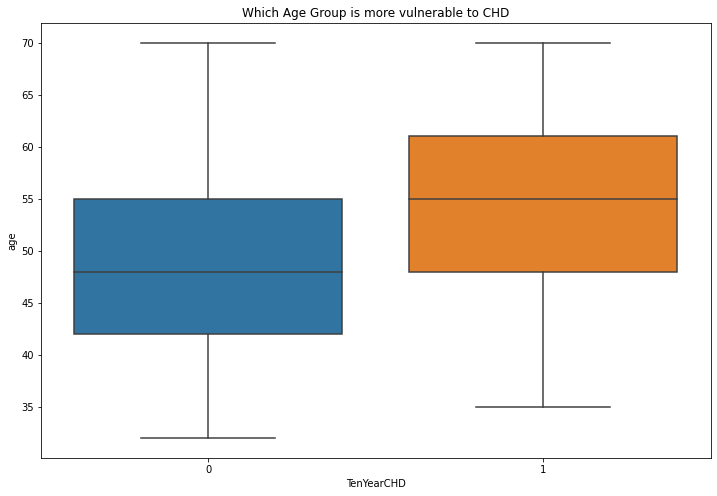

In [ ]:
# Chart - 1 visualization code
plt.rcParams['figure.figsize'] = (12, 8)
sns.boxplot(x='TenYearCHD',y='age',data=cardio_df)
plt.title("Which Age Group is more vulnerable to CHD")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

We came to know :

1) There is no distinct age group which are at risk and not at risk.

2) Roughly, patients having age upto 50 are less prone and beyond 50 are more prone to CHD. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This visualization shows that patients after the age of 50 are more prone to Coronary Heart Disease(CHD).

#### Chart - 2

In [ ]:
round(cardio_df['sex'].value_counts()/len(cardio_df)*100,2)

F    56.73
M    43.27
Name: sex, dtype: float64

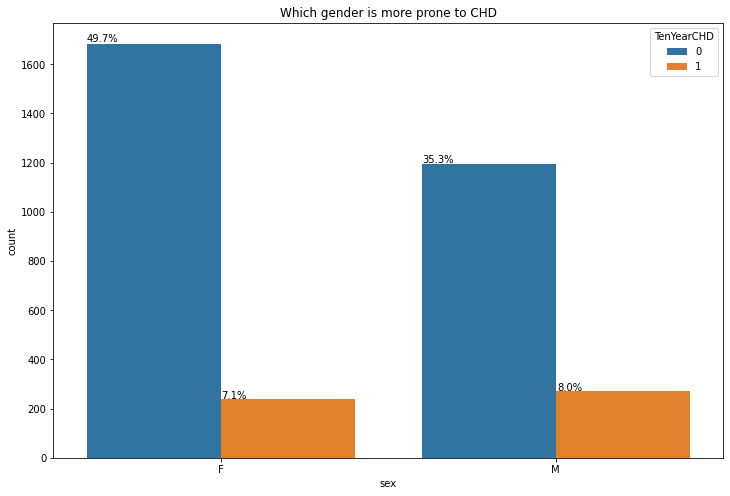

In [ ]:
# Chart - 2 visualization code
plt.rcParams['figure.figsize'] = (12, 8)
ax = sns.countplot(x = cardio_df['sex'], hue = cardio_df['TenYearCHD'])
plt.title("Which gender is more prone to CHD")
for p in ax.patches:
    ax.annotate('{:.1%}'.format(p.get_height()/len(cardio_df)), (p.get_x() * 1.005, p.get_height() * 1.005))


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

We came to know :    
 On the basis of gender, patients which are at risk of CHD(out of the total): 

 Females are 7.1% 

 Males are 8% 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This visualization shows that Males are more prone to CHD as compared to Females but there is not a significant difference( only 1 % )

#### Chart - 3

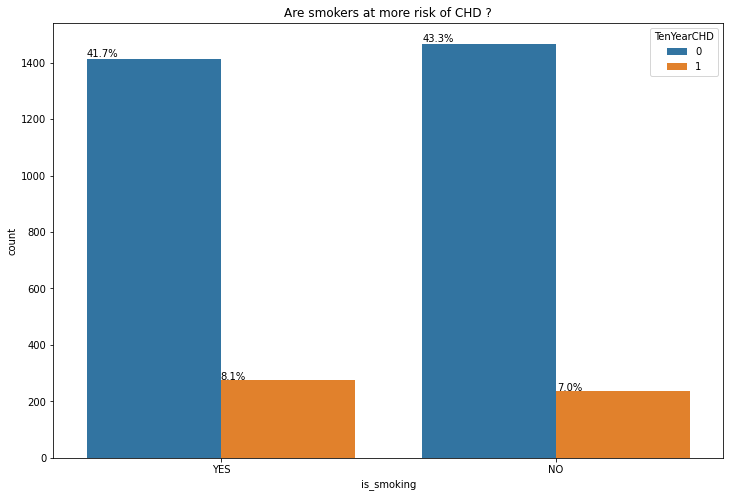

In [ ]:
# Chart - 3 visualization code
plt.rcParams['figure.figsize'] = (12, 8)
ax1 = sns.countplot(x = cardio_df['is_smoking'], hue = cardio_df['TenYearCHD'])
plt.title("Are smokers at more risk of CHD ?")
for p in ax1.patches:
    ax1.annotate('{:.1%}'.format(p.get_height()/len(cardio_df)), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

We came to know :    
 On the basis of smoking, patients which are at risk of CHD(out of the total): 

 Patients who don't smoke are 7 % 

 Patients who smoke are 8.1 % 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This visualization shows that Smokers are more prone to CHD as compared to Non-Smokers but there is not a significant difference( only 1 % )

#### Chart - 4

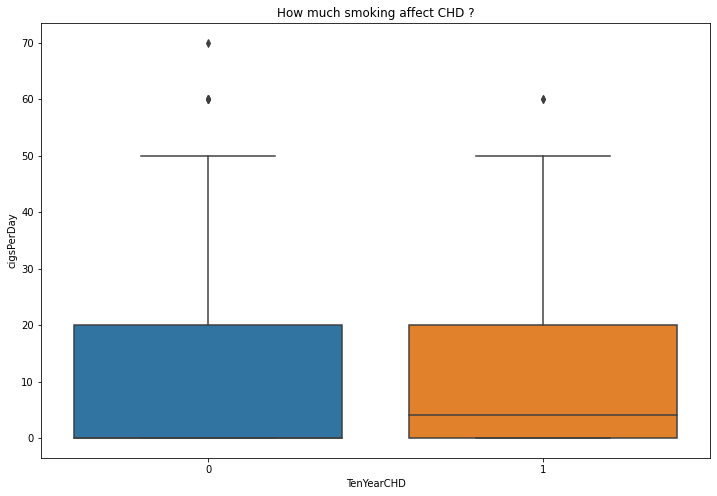

In [ ]:
# Chart - 4 visualization code
plt.rcParams['figure.figsize'] = (12, 8)
sns.boxplot(x='TenYearCHD',y='cigsPerDay',data=cardio_df)
plt.title("How much smoking affect CHD ?")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

We came to know : 

Patients having risk and not having risk of CHD, don't have a difference in the amount of cigarette consumed per day.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This visualization shows that number of cigarettes consumed per day has no effect on the risk of CHD.

#### Chart - 5

In [ ]:
cardio_df['BPMeds'].value_counts()

0.0    3246
1.0     100
Name: BPMeds, dtype: int64

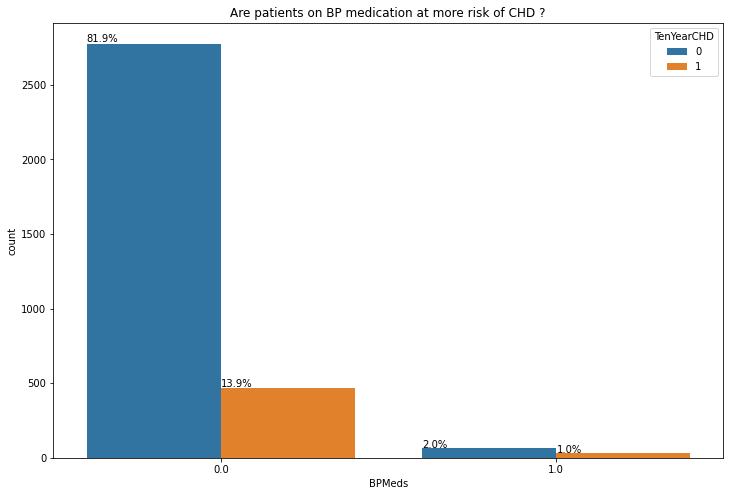

In [ ]:
# Chart - 5 visualization code
plt.rcParams['figure.figsize'] = (12, 8)
ax2 = sns.countplot(x = cardio_df['BPMeds'], hue = cardio_df['TenYearCHD'])
plt.title("Are patients on BP medication at more risk of CHD ?")
for p in ax2.patches:
    ax2.annotate('{:.1%}'.format(p.get_height()/len(cardio_df)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

We came to know :    
 On the basis of BP Meds, patients which are at risk of CHD(out of the total): 

 Patients who are not on BP Medication are 13.9 % 

 Patients who are on BP Medication are 1 % 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This visualization shows that BP Medication has no effect on the risk of CHD. (Instead more patients are prone to CHD who don't are on BP Medication)

**This may be due to only 3 % patients out of the total are on BP Medication**. **So, we can't infer whether BP Meds has an effect on risk of CHD or not.** 

#### Chart - 6

In [ ]:
cardio_df['prevalentStroke'].value_counts()

0    3368
1      22
Name: prevalentStroke, dtype: int64

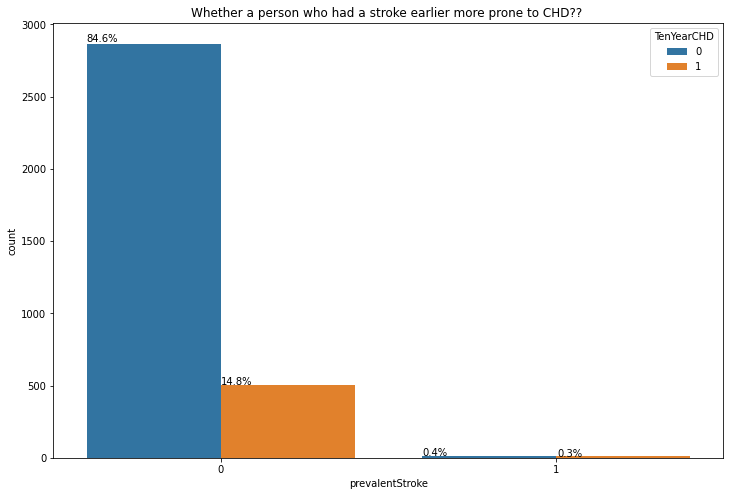

In [ ]:
# Chart - 6 visualization code
plt.rcParams['figure.figsize'] = (12, 8)
ax3 = sns.countplot(x = cardio_df['prevalentStroke'], hue = cardio_df['TenYearCHD'])
plt.title("Whether a person who had a stroke earlier more prone to CHD?? ")
for p in ax3.patches:
    ax3.annotate('{:.1%}'.format(p.get_height()/len(cardio_df)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

We came to know :    
 On the basis of Prevalent Stroke, patients which are at risk of CHD(out of the total): 

 Patients who don't had a stroke are 14.8 % 

 Patients who had a stroke are 0.3 % 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This visualization shows that Prevalent Stroke has no effect on the risk of CHD. (Instead more patients are prone to CHD who don't had a stroke earlier.)

**This may be due to only 0.7 % patients out of the total had a stroke earlier.** **So, we can't infer whether Prevalent Stroke has an effect on risk of CHD or not.**

#### Chart - 7

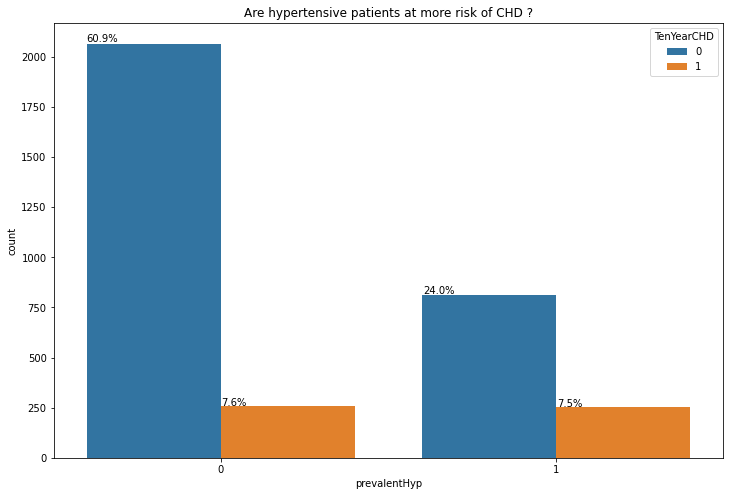

In [ ]:
# Chart - 7 visualization code
plt.rcParams['figure.figsize'] = (12, 8)
ax4 = sns.countplot(x = cardio_df['prevalentHyp'], hue = cardio_df['TenYearCHD'])
plt.title("Are hypertensive patients at more risk of CHD ?")
for p in ax4.patches:
    ax4.annotate('{:.1%}'.format(p.get_height()/len(cardio_df)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

We came to know :    
 On the basis of Prevalent Hypertension, patients which are at risk of CHD(out of the total): 

 Patients who don't had hypertension are 7.6 % 

 Patients who had hypertension are 7.5 % 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This visualization shows that Prevalent Hypertension has an effect on the risk of CHD. There are around 69 % patients which don't had hypertension and 30 % patients had hypertension.

Due to this imbalance, we are getting equally prone to CHD in percentage for both type of patients.



#### Chart - 8

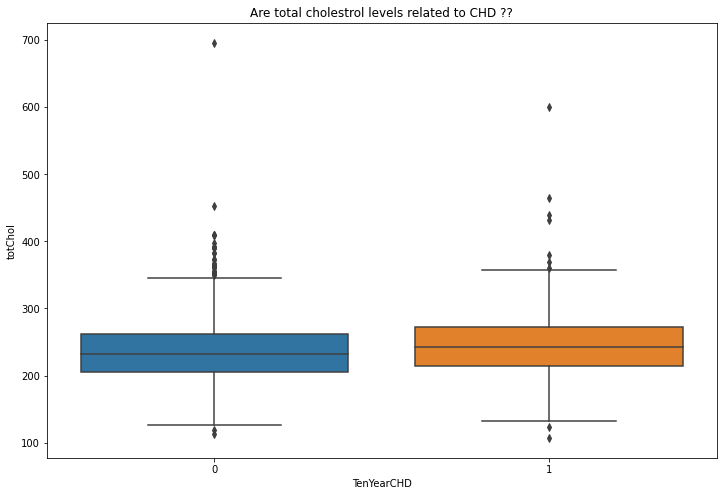

In [ ]:
# Chart - 8 visualization code
plt.rcParams['figure.figsize'] = (12, 8)
sns.boxplot(x = cardio_df['TenYearCHD'], y = cardio_df['totChol'])
plt.title("Are total cholestrol levels related to CHD ??")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

We came to know : 
 
The distribution of total cholestrol level for patients having or not having risk of CHD is almost same.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This indicates that cholestrol level is not the sole deciding factor for predicting whether the person gets coronary heart disease or not. People with similar levels of cholestrol have got coronary heart disease as well as are free from coronary heart disease. Clearly, there is no direct correlation of coronary heart disease with the cholestrol level.

#### Chart - 9

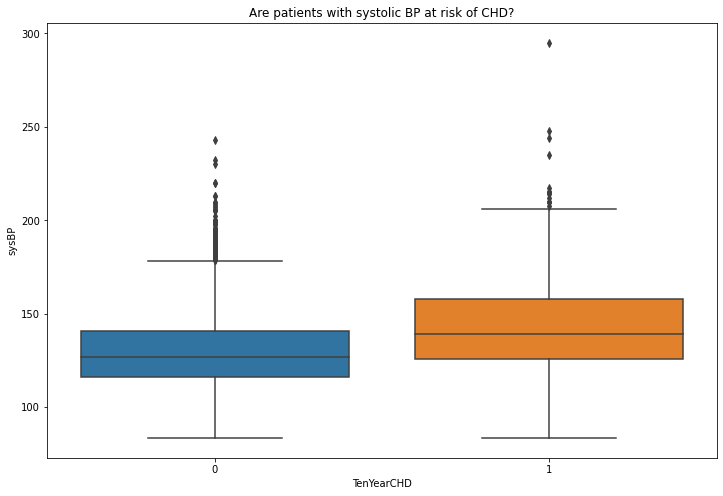

In [ ]:
# Chart - 9 visualization code
plt.rcParams['figure.figsize'] = (12, 8)
sns.boxplot(x = cardio_df['TenYearCHD'], y = cardio_df['sysBP'])
plt.title("Are patients with systolic BP at risk of CHD?")
plt.show()

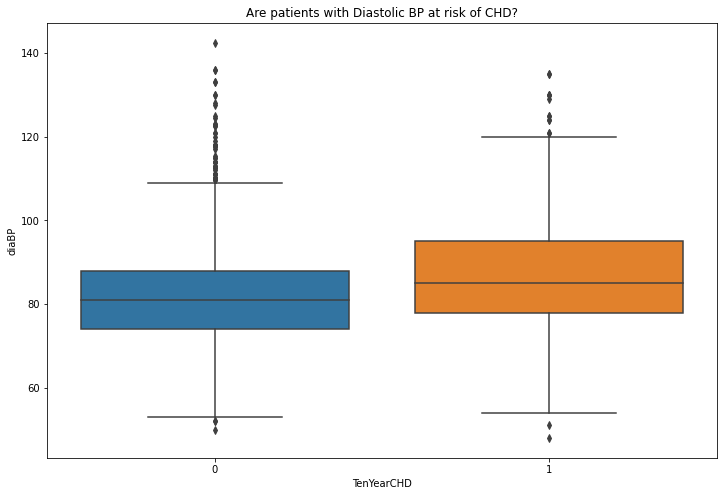

In [ ]:
plt.rcParams['figure.figsize'] = (12, 8)
sns.boxplot(x = cardio_df['TenYearCHD'], y = cardio_df['diaBP'])
plt.title("Are patients with Diastolic BP at risk of CHD?")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

We came to know : 

The distributions of both systolic BP and diastolic BP for patients having risk of CHD are slightly upward than the patients don't having risk of CHD.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This visualization shows that sysBP and DiaBP have an effect on the risk of CHD but there is not a significant effect. 

#### Chart - 10

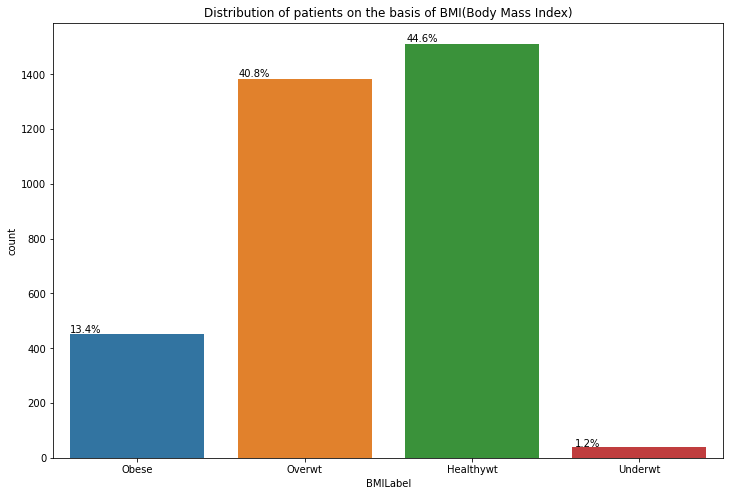

In [ ]:
# Chart - 10 visualization code
plt.rcParams['figure.figsize'] = (12, 8)
ax5 = sns.countplot(x = cardio_df['BMILabel'])
plt.title("Distribution of patients on the basis of BMI(Body Mass Index)")

for p in ax5.patches:
    ax5.annotate('{:.1%}'.format(p.get_height()/len(cardio_df)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

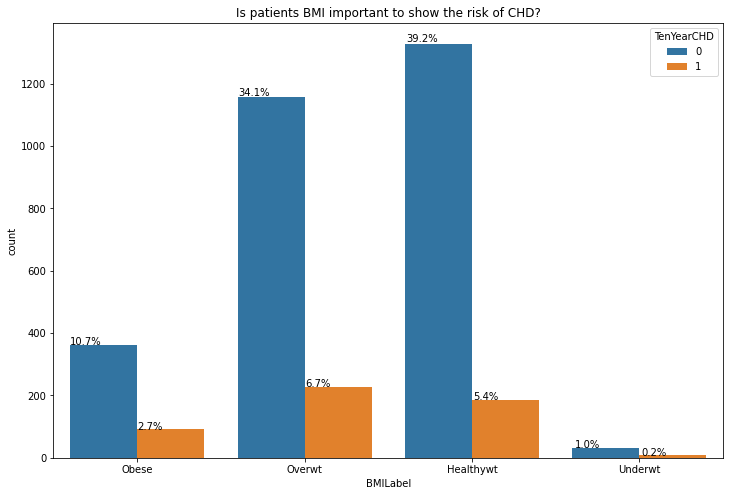

In [ ]:
# Chart - 10 visualization code
plt.rcParams['figure.figsize'] = (12, 8)
ax6 = sns.countplot(x = cardio_df['BMILabel'], hue = cardio_df['TenYearCHD'])
plt.title('Is patients BMI important to show the risk of CHD?')

for p in ax6.patches:
    ax6.annotate('{:.1%}'.format(p.get_height()/len(cardio_df)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

We came to know :    
 On the basis of BMI Label, patients which are at risk of CHD(out of the total): 

 Patients who are Healthyweight are 5.4 % 

 Patients who are Overweight are 6.7 % 

 Patients who are Obese are 2.7 % 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This visualization shows that BMI has an effect on the risk of CHD which is as follows :

For Overweight, around 15 % of patients out of them have risk of CHD

For Obese, around 20 % of patients out of them have risk of CHD




#### Chart - 11

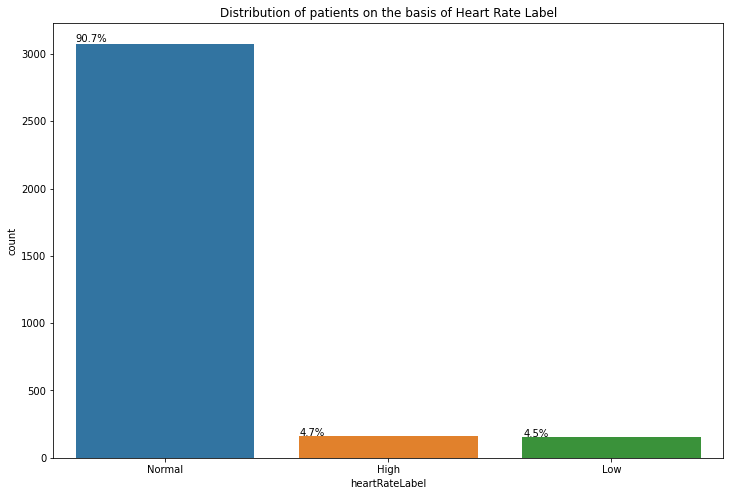

In [ ]:
# Chart - 11 visualization code
plt.rcParams['figure.figsize'] = (12, 8)
ax7 = sns.countplot(x = cardio_df['heartRateLabel'])
plt.title('Distribution of patients on the basis of Heart Rate Label')
for p in ax7.patches:
    ax7.annotate('{:.1%}'.format(p.get_height()/len(cardio_df)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

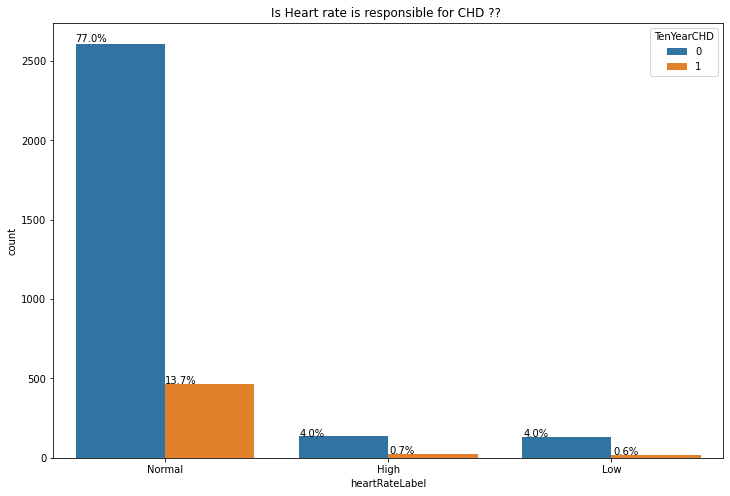

In [ ]:
# Chart - 11 visualization code
plt.rcParams['figure.figsize'] = (12, 8)
ax8 = sns.countplot(x = cardio_df['heartRateLabel'],hue= cardio_df['TenYearCHD'])
plt.title("Is Heart rate is responsible for CHD ?? ")
for p in ax8.patches:
    ax8.annotate('{:.1%}'.format(p.get_height()/len(cardio_df)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

We came to know :    
 On the basis of Heart Rate Label, patients which are at risk of CHD(out of the total): 

 Patients who have High Heart Rate are 0.7 % 

 Patients who have Low Heart Rate are 0.6 % 



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This visualization shows that Heart Rate has an effect on the risk of CHD which is as follows :

For High Heart Rate patients, around 20 %  out of them have risk of CHD

 For Low Heart Rate patients, around 15 %  out of them have risk of CHD



#### Chart - 12

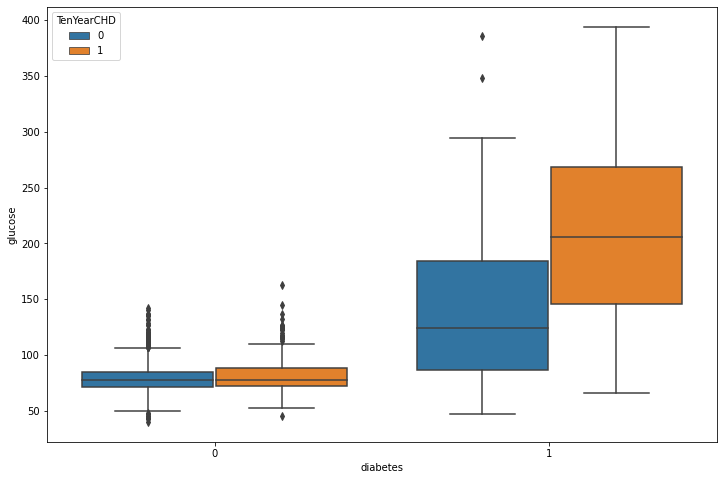

In [ ]:
# Chart - 12 visualization code
plt.rcParams['figure.figsize'] = (12, 8)
sns.boxplot(x = cardio_df['diabetes'],y= cardio_df['glucose'], hue = cardio_df['TenYearCHD'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

We came to know : 

1) The distribution of glucose level for patients having diabetes and risk of CHD is higher than those having diabetes but don't having risk of CHD.

2) The distribution of glucose level for patients don't having diabetes but having risk of CHD is similar to those don't having diabetes and risk of CHD.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This visualization shows that diabetes and glucose level have an effect on the risk of CHD.

#### Chart - 13 - Correlation Heatmap

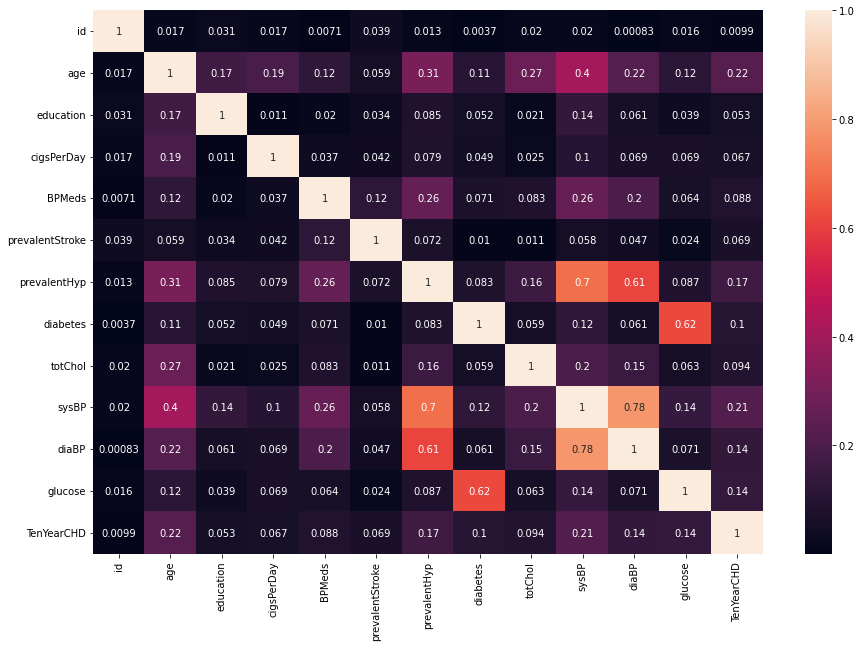

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,10))
correlation = cardio_df.corr()
sns.heatmap(abs(correlation), annot=True)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

We came to know : 

1) Glucose level and diabetes are highly positively correlated (having  correlation value of 0.62).

2) Both Systolic BP and Diastolic BP are highly positively correlated with Prevalent Hypertension (having correlation value of 0.7 and 0.61 respectively).

3) Age and Systolic BP are positively correlated (having correlation value of 0.4).

4) Systolic BP and Diastolic BP are highly positively correlated (having correlation value of 0.78).



## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [24]:
# Making a copy of dataset cardio_df for Pre-processing
cvs_df = cardio_df.copy() 

In [25]:
# Handling Missing Values & Missing Value Imputation
# Checking missing values in each column(as percentage)
round(cvs_df.isnull().sum()/len(cvs_df)*100,2)

id                 0.00
age                0.00
education          2.57
sex                0.00
is_smoking         0.00
cigsPerDay         0.65
BPMeds             1.30
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
totChol            1.12
sysBP              0.00
diaBP              0.00
glucose            8.97
heartRateLabel     0.00
BMILabel           0.00
TenYearCHD         0.00
dtype: float64

In [26]:
# Dropping the rows having missing values in Cigs Per Day column
cvs_df.drop(index=cvs_df[cvs_df['cigsPerDay'].isna()].index,axis=0,inplace=True)

In [27]:
# Imputing the missing values of Education and BPMeds columns with their most occuring values i.e mode respectively
cvs_df['education'].fillna(cvs_df['education'].mode()[0], inplace = True)

cvs_df['BPMeds'].fillna(cvs_df['BPMeds'].mode()[0],inplace = True)

In [28]:
# Imputing the missing values of TotChol and Glucose columns with their medians respectively
cvs_df['totChol'].fillna(cvs_df['totChol'].median(),inplace = True)

cvs_df['glucose'].fillna(cvs_df['glucose'].median(),inplace = True)

In [29]:
# Assigning correct data types to the respective columns after handling missing values
cvs_df['education']=cvs_df['education'].astype(int)

cvs_df['cigsPerDay']=cvs_df['cigsPerDay'].astype(int)

cvs_df['BPMeds']=cvs_df['BPMeds'].astype(int)

cvs_df['totChol']=cvs_df['totChol'].astype(int)

cvs_df['glucose']=cvs_df['glucose'].astype(int)


In [30]:
cvs_df.dtypes

id                   int64
age                  int64
education            int64
sex                 object
is_smoking          object
cigsPerDay           int64
BPMeds               int64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol              int64
sysBP              float64
diaBP              float64
glucose              int64
heartRateLabel      object
BMILabel            object
TenYearCHD           int64
dtype: object

#### What all missing value imputation techniques have you used and why did you use those techniques?

Handling missing values in different columns by using different techniques which are as follows :

1) Dropping the rows having missing values in Cigs Per Day column as it has less than 1 % missing values i.e 0.65 %

2) Imputing the missing values of Education and BPMeds columns with their most occuring values i.e mode respectively as they are categorical columns.

3) Imputing the missing values of TotChol and Glucose columns with their medians respectively as they are numerical columns with outliers.

4) Assigning correct data types to the respective columns after handling missing values i.e making all of them as integers for convenience.

### 2. Handling Outliers

In [31]:
# Handling Outliers & Outlier treatments


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [32]:
# Encode your categorical columns
# One Hot Encoding on categorical columns(nominal)

cvs_df=pd.get_dummies(cvs_df,columns=['sex','prevalentHyp'])

In [33]:
# Ordinal Encoding on ordinal columns - BMI Label and Heart Rate Label
cvs_df['BMILabel']=cvs_df['BMILabel'].map({'Underwt':1,'Healthywt':2,'Overwt':3,'Obese':4})

cvs_df['heartRateLabel']=cvs_df['heartRateLabel'].map({'Low':1,'Normal':2,'High':3})

#### What all categorical encoding techniques have you used & why did you use those techniques?

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [34]:
# Manipulate Features to minimize feature correlation and create new features

# Blood glucose levels can be used to classify the severity of Diabetes.
def diabetes_grade(glucose):
  '''  '''
  if glucose <= 140: # 140 mg/dL (glucose level)
     value = 1 # 'Normal'
  elif glucose < 200:  # 200 mg/dL (glucose level)
     value = 2 # 'Prediabetic'
  else:
     value = 3 # 'Diabetic'
  
  return value

# Creating new feature diabetes_grade which classify the severity of Diabetes
cvs_df['Diabetes_grade'] = cvs_df['glucose'].apply(diabetes_grade)


In [35]:
# The absolute number of cigarettes per day is not much useful variable because the stiffness 
# of blood vessels increases as the number of cigarettes consumed per day increases. 
# So creating new feature containing log-transformed value which could be more useful.

cvs_df['SmokingFactor'] = cvs_df['cigsPerDay'].apply(lambda x: 0 if x < 1 else np.log(x))

In [36]:
# Systolic and Diastolic blood pressure has a high correlation that can be commonly classified into hypertension.
def blood_presure_classification(SysBP, DiaBP):
  '''  '''
  
  if (SysBP < 120) and (DiaBP < 80): # 120 mm Hg and 80 mm Hg (Blood Pressure level)
    value = 1 # 'Normal'
  elif (SysBP < 130) and (DiaBP < 80): # 130 mm Hg and 80 mm Hg (Blood Pressure level)
    value =  2 # 'Elevated'
  elif (SysBP < 140) or (DiaBP < 90): # 140 mm Hg and 90 mm Hg (Blood Pressure level)
    value =  3 # 'Hypertension Stage 1'
  elif (SysBP <= 180) or (DiaBP <= 90): # 180 mm Hg and 90 mm Hg (Blood Pressure level)
    value =  4 # 'Hypertension Stage 2'
  else :
    value =  5 # 'Hypertensive Crises'
  
  return value
  
#  Creating new feature Hypertension which classify the level of Blood Pressure
cvs_df['Hypertension'] = cvs_df.apply(lambda x: blood_presure_classification(x['sysBP'],x['diaBP']),axis=1)

In [37]:
# Removing old features 
cvs_df.drop(['glucose','diabetes','cigsPerDay','is_smoking','sysBP','diaBP'],axis=1,inplace= True)

# Removing irrelevant features
cvs_df.drop(['BPMeds','prevalentStroke'],axis=1,inplace= True)

In [38]:
# Target variable should be the last column
columns=list(cvs_df.columns)
columns.remove('TenYearCHD')
columns.append('TenYearCHD')
cvs_df=cvs_df[columns]
cvs_df.head()

,id,age,education,totChol,heartRateLabel,BMILabel,sex_F,sex_M,prevalentHyp_0,prevalentHyp_1,Diabetes_grade,SmokingFactor,Hypertension,TenYearCHD
0,0,64,2,221,2,4,1,0,1,0,1,1.098612,3,1
1,1,36,4,212,2,3,0,1,0,1,1,0.000000,4,0
2,2,46,1,250,2,2,1,0,1,0,1,2.302585,1,0
3,3,50,1,233,2,3,0,1,0,1,1,2.995732,3,1
4,4,64,1,241,2,3,1,0,1,0,1,3.401197,3,0


In [87]:
# Setting Id column as index
cvs_df.set_index(['id'],inplace=True)

#### 2. Feature Selection

In [88]:
# Select your features wisely to avoid overfitting
cvs_df.columns.tolist()

['age',
 'education',
 'totChol',
 'heartRateLabel',
 'BMILabel',
 'sex_F',
 'sex_M',
 'prevalentHyp_0',
 'prevalentHyp_1',
 'Diabetes_grade',
 'SmokingFactor',
 'Hypertension',
 'TenYearCHD']

##### What all feature selection methods have you used  and why?

I have used correlation concept to manipulate and select the important features in the dataset.

**Pearson** **correlation**

A Pearson correlation is a number between -1 and 1 that indicates the extent to which two variables are linearly related. The Pearson correlation is also known as the “product moment correlation coefficient” (PMCC) or simply “correlation”

Pearson correlations are suitable only for metric variables The correlation coefficient has values between -1 to 1

• A value closer to 0 implies weaker correlation (exact 0 implying no correlation)

• A value closer to 1 implies stronger positive correlation

• A value closer to -1 implies stronger negative correlation

**Some Feature Manipulation done :**


1.   Features like glucose and diabetes are highly correlated, so they are combined to create a new feature Diabetes_grade which classify the severity of Diabetes( making it an ordinal categorical feature ).

2.   Features like Systolic BP and Diastolic BP are highly correlated, so they are combined to create a new feature Hypertension which classify the level of Blood Pressure( making it an ordinal categorical feature ).

3.   The absolute number of cigarettes per day is not much useful variable because the stiffness of blood vessels increases as the number of cigarettes consumed per day increases. So creating a new feature Smoking Factor containing log-transformed value of it.

##### Which all features you found important and why?

Based on the correlation concept either dropping or combining features in order to have only important features that contribute uniquely in predicting the target variable i.e. Ten Year CHD.

Important Features considered are:




*   Age
*   Education
*   TotChol
*   HeartRateLabel
*   BMILabel
*   Sex
*   PrevalentHyp
*   Diabetes_grade
*   SmokingFactor
*   Hypertension













### 5. Data Transformation

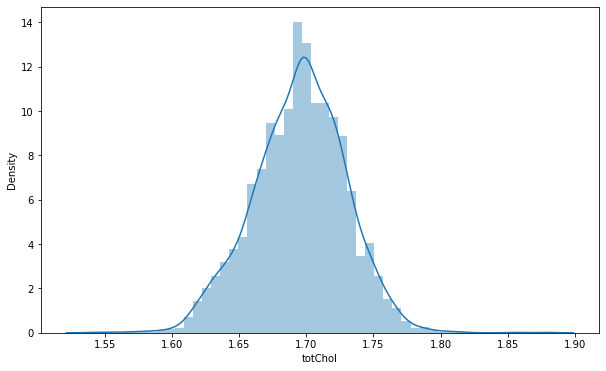

In [89]:
# Transform Your data
# Visualise totChol distribution after log-transformation
sns.distplot(np.log(cvs_df['totChol']))

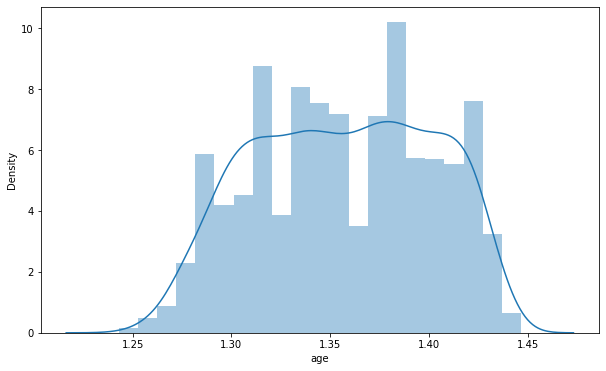

In [90]:
# Transform Your data
# Visualise age distribution after log-transformation
sns.distplot(np.log(cvs_df['age']))

In [91]:
# Log-Transforming totChol and age column
cvs_df['totChol']=np.log(cvs_df['totChol'])
cvs_df['age']=np.log(cvs_df['age'])

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Some of the features needed to be transformed to make it gaussian(normal) distribution to have more accurate predictions and that are totChol and age.

We have applied non-linear transformations i.e log-transformation on totChol and age features to make them gaussian distribution.
Age feature is transformed to gaussian approximately.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

As per my knowledge, for this dataset dimensionality reduction is not required.

For this dataset, there are not many features but some 10 to 15 features and most of them are important in predicting the sales. I have 
identified those highly correlated variables and combined them to create new features and variables which are not related to the target variable and dropped them.

In large datasets, very often the variables are highly correlated. The very purpose of applying dimension reduction techniques like PCA is to identify those highly correlated variables or variables which are not related to the target variable and drop them out from further analysis.

Having highly correlated variables leads to overfitting and hence the accuracy of the model will suffer. 

So, it is good to do the dimensionality reduction wherever possible but here it is not required.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In [92]:
# Percentage distribution of classes in the target variable i.e Ten Year CHD
cvs_df['TenYearCHD'].value_counts()/len(cvs_df)*100

0    84.857482
1    15.142518
Name: TenYearCHD, dtype: float64

Imbalanced dataset is relevant primarily in the context of supervised machine learning involving two or more classes.

Imbalance means that the number of data points available for different the classes is different:
If there are two classes, then balanced data would mean 50% points for each of the class. For most machine learning techniques, little imbalance is not a problem. So, if there are 60% points for one class and 40% for the other class, it should not cause any significant performance degradation. Only when the class imbalance is high, e.g. 90% points for one class and 10% for the other, standard optimization criteria or performance measures may not be as effective and would need modification.

We can see that there is clearly a class imbalance condition having nearly 85/15 ratio i.e 85 % data points are of 0 class(not having risk of CHD) and 15 % data points are of 1 class(having risk of CHD).

Let's Resample the dataset to over come this imbalance. We will apply SMOTE (Synthetic Minority Oversampling Technique) to resample the data. It works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [93]:
# Handling Imbalanced Dataset (If needed)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# Creating the dataset with all independent variables 
X = cvs_df.iloc[:,:-1]

# Creating the dataset with the dependent variable 
y = cvs_df.iloc[:,-1]


# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X,y)

print('Original dataset shape', len(cvs_df))
print('Resampled dataset shape', len(y_smote))




Original dataset shape 3368
Resampled dataset shape 5716


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I have used SMOTE (Synthetic Minority Over-sampling technique) for balanced the 85:15 dataset.

SMOTE is a technique in machine learning for dealing with issues that arise when working with an unbalanced data set. In practice, unbalanced data sets are common and most ML algorithms are highly prone to unbalanced data so we need to improve their performance by using techniques like SMOTE. 

To address this disparity, balancing schemes that augment the data to make it more balanced before training the classifier were proposed. Oversampling the minority class by duplicating minority samples or undersampling the majority class is the simplest balancing method. 

The idea of incorporating synthetic minority samples into tabular data was first proposed in SMOTE, where synthetic minority samples are generated by interpolating pairs of original minority points.

SMOTE is a data augmentation algorithm that creates synthetic data points from raw data. SMOTE can be thought of as a more sophisticated version of oversampling or a specific data augmentation algorithm. 

SMOTE has the advantage of not creating duplicate data points, but rather synthetic data points that differ slightly from the original data points. SMOTE is a superior oversampling option.

That's why for lots of advantages, I have used SMOTE technique for balancing the dataset.


There are two competing concerns: with less training data, your parameter estimates have greater variance. With less testing data, your performance statistic will have greater variance. Broadly speaking you should be concerned with dividing data such that neither variance is too high, which is more to do with the absolute number of instances in each category rather than the percentage.

If you have a total of 100 instances, you're probably stuck with cross validation as no single split is going to give you satisfactory variance in your estimates. If you have 100,000 instances, it doesn't really matter whether you choose an 80:20 split or a 90:10 split (indeed you may choose to use less training data if your method is particularly computationally intensive).

You'd be surprised to find out that 80/20 is quite a commonly occurring ratio, often referred to as the Pareto principle.

However, I have used 70/30 ratio i.e 70 % data as training dataset and remaining 30 % as testing dataset because we have less data i.e less number of rows (only 3368 rows) to reduce variance in testing data.

### 8. Data Splitting

In [94]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Splitting the dataset cvs_df into the Training set and Test set


# Splitting the actual dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.3, random_state = 42)

##### What data splitting ratio have you used and why? 

### 6. Data Scaling

In [95]:
# Scaling your data
# Applying Standard Scaling technique to train and test data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train[list(x_train.columns)] = scaler.fit_transform(x_train[list(x_train.columns)])
x_test[list(x_test.columns)] = scaler.transform(x_test[list(x_test.columns)])

##### Which method have you used to scale you data and why?

**Standardization** 

Data standardization is the process of rescaling the attributes so that they have mean as 0 and variance as 1.

The ultimate goal is to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.
In sklearn.preprocessing.StandardScaler(), centering and scaling happens independently on each feature.

It scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.

I have used to Standardization i.e. StandardScaler() to scale all the features of the dataset except the target feature (Ten Year CHD). As totChol and age features are transformed to gaussian distribution, we are using standardization.

## ***7. ML Model Implementation***

### ML Model - 1

In [98]:
# 
from sklearn.metrics import precision_score,recall_score

# 
from sklearn.metrics import roc_auc_score,roc_curve

# Import confusion_matrix
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Setup arrays to store training and test accuracies
neighbors = np.arange(1,30)

test_roc_auc = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    kNN = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    kNN.fit(x_train, y_train)
    
    y_pred_=kNN.predict(x_test)
    
    
    # Compute accuracy on the test set
    test_roc_auc[i] = roc_auc_score(y_test, y_pred_)

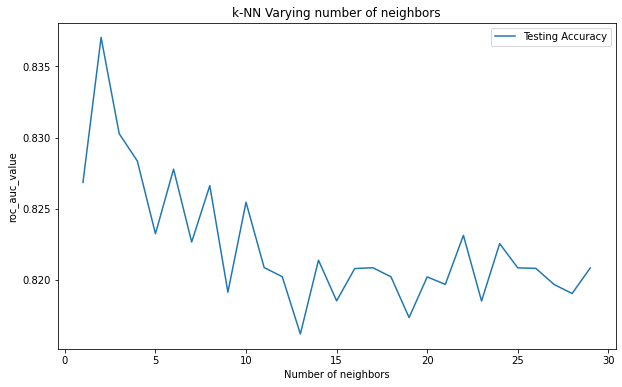

In [ ]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_roc_auc, label='Testing Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Roc_auc_value')
plt.show()

In [99]:
def model_implement_smote_data(model,x_train,x_test,y_train,y_test):
  ''' '''
 
  #
  model.fit(x_train,y_train)

  #
  y_pred=model.predict(x_test)

  
  print('Precision Score : ' ,precision_score(y_test,y_pred))

  print('Recall Score : ' ,recall_score(y_test,y_pred))
  
  #
  print(confusion_matrix(y_test,y_pred))
  #
  y_pred_proba = model.predict_proba(x_test)[:,1]

  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
  plt.plot([0,1],[0,1],'k--')
  plt.plot(fpr,tpr, label='model')
  plt.xlabel('fpr')
  plt.ylabel('tpr')
  plt.title(f'{model} ROC curve')
  plt.show()


  print('ROC-AUC score:',roc_auc_score(y_test, y_pred))

  print(classification_report(y_test,y_pred))

  

Precision Score :  0.9149855907780979
Recall Score :  0.7426900584795322
[[801  59]
 [220 635]]


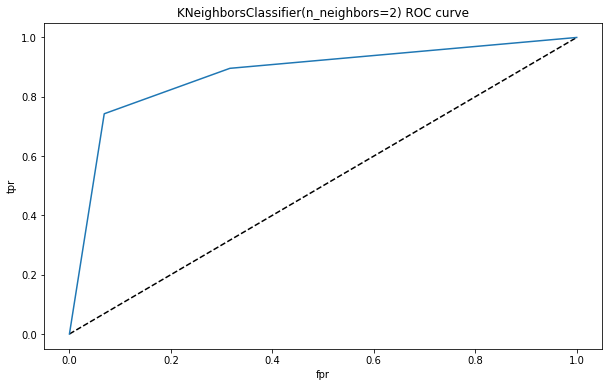

ROC-AUC score: 0.8370427036583707
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       860
           1       0.91      0.74      0.82       855

    accuracy                           0.84      1715
   macro avg       0.85      0.84      0.84      1715
weighted avg       0.85      0.84      0.84      1715



In [ ]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=2)

# On Smote data
# Applying the function for fitting algorithm, predicting on test data and find evaluation metrics

model_implement_smote_data(knn,x_train,x_test,y_train,y_test)

In [100]:
# Creating the dataset with all independent variables 
X = cvs_df.iloc[:,:-1]

# Creating the dataset with the dependent variable 
y = cvs_df.iloc[:,-1]

# Splitting the actual dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Scaling your data
# Applying Standard Scaling technique to train and test data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[list(X_train.columns)] = scaler.fit_transform(X_train[list(X_train.columns)])
X_test[list(X_test.columns)] = scaler.transform(X_test[list(X_test.columns)])

In [101]:
def model_implement_actual_data(model,x_test,y_test):
  ''' '''
 
  
  

  #
  y_pred=model.predict(x_test)

  
  print('Precision Score : ' ,precision_score(y_test,y_pred))

  
  print('Recall Score : ' ,recall_score(y_test,y_pred))

  
  #
  print(confusion_matrix(y_test,y_pred))
  #
  y_pred_proba = model.predict_proba(x_test)[:,1]

  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
  plt.plot([0,1],[0,1],'k--')
  plt.plot(fpr,tpr, label='model')
  plt.xlabel('fpr')
  plt.ylabel('tpr')
  plt.title(f'{model} ROC curve')
  plt.show()


  print('ROC-AUC score:',roc_auc_score(y_test, y_pred))

  print(classification_report(y_test,y_pred))

  

Precision Score :  0.5963302752293578
Recall Score :  0.3939393939393939
[[802  44]
 [100  65]]


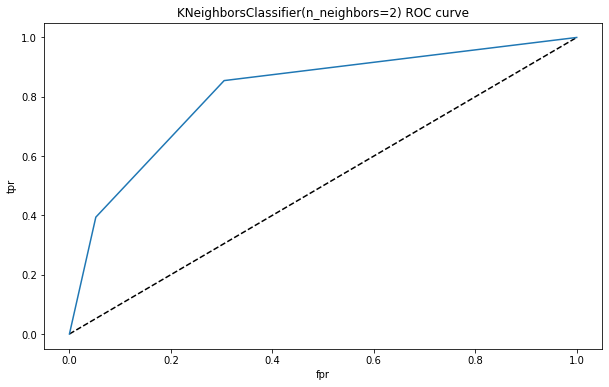

ROC-AUC score: 0.6709649688373094
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       846
           1       0.60      0.39      0.47       165

    accuracy                           0.86      1011
   macro avg       0.74      0.67      0.70      1011
weighted avg       0.84      0.86      0.85      1011



In [ ]:
# On Actual data
# Applying the function for fitting algorithm, predicting on test data and find evaluation metrics

model_implement_actual_data(knn,X_test,Y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

I have used K Nearest Neighbours (kNN) algorithm to predict whether patient is having a risk of CHD or not.

On balanced data got from Smote technique, I applied kNN algorithm on training data for a range of k values from 1 to 30 and got that for the testing data, highest AUC-ROC value is for the k value of 2 (k=2). 

I applied kNN for k = 2 on actual testing data and got following results :

**For the  actual testing data**, 

ROC-AUC score: 0.67

Precision Score :  0.60

Recall Score :  0.39

f1-score : 0.47 


I have not got good results, so improving by using hyperparameter tuning. 

In [ ]:
# Visualizing evaluation Metric Score chart
# Columns needed to compare metrics
global metrics_df
metrics_df=pd.DataFrame()

def eval_metric_chart(model,x_train,x_test,y_train,y_test,metrics_df):
  
  y_pred=model.predict(x_test)

  roc_auc=roc_auc_score(y_test, y_pred)

  recall=recall_score(y_test,y_pred)

  precision= precision_score(y_test,y_pred)

  F_Score = (2 * precision * recall) / (precision + recall)
  columns = ['Model_Name','ROC_AUC','Recall','Precision','F_Score']
  metrics = [model, roc_auc,recall,precision,F_Score]
  metrics_dict = dict(zip(columns,metrics))
  
  metrics_df=metrics_df.append(metrics_dict,ignore_index=True)
  print(metrics_df)

In [ ]:
#
eval_metric_chart(knn,X_train,X_test,Y_train,Y_test,metrics_df)
  

                            Model_Name   ROC_AUC    Recall  Precision
0  KNeighborsClassifier(n_neighbors=2)  0.670965  0.393939    0.59633


#### 2. Cross- Validation & Hyperparameter Tuning

Precision Score :  0.845
Recall Score :  0.7906432748538011
[[736 124]
 [179 676]]


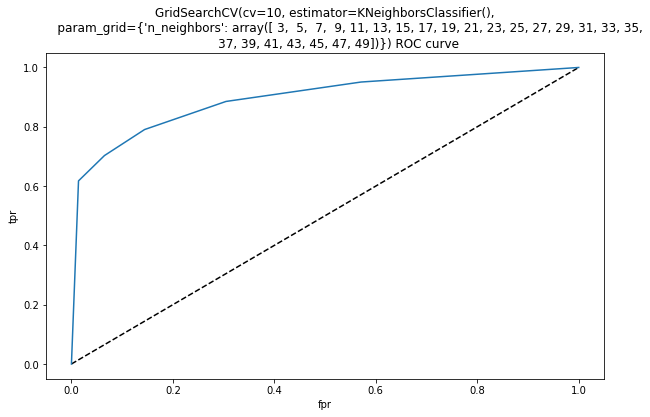

ROC-AUC score: 0.8232286141710867
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       860
           1       0.84      0.79      0.82       855

    accuracy                           0.82      1715
   macro avg       0.82      0.82      0.82      1715
weighted avg       0.82      0.82      0.82      1715

The best values of hyperparameters are found out to be : {'n_neighbors': 5}


In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
# Predict on the model
# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(3,50,2)}

knn_ = KNeighborsClassifier()
knn_hyp= GridSearchCV(knn_,param_grid,cv=10)
knn_Hyp=knn_hyp
model_implement_smote_data(knn_hyp,x_train,x_test,y_train,y_test)

print("The best values of hyperparameters is found out to be :" ,knn_hyp.best_params_)

Precision Score :  0.39215686274509803
Recall Score :  0.48484848484848486
[[722 124]
 [ 85  80]]


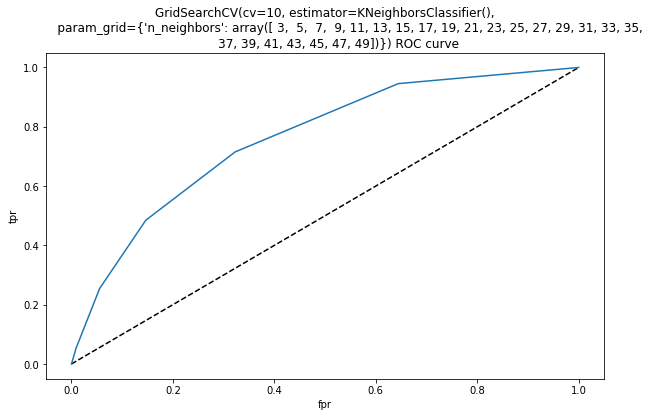

ROC-AUC score: 0.6691381904147862
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       846
           1       0.39      0.48      0.43       165

    accuracy                           0.79      1011
   macro avg       0.64      0.67      0.65      1011
weighted avg       0.81      0.79      0.80      1011



In [ ]:
model_implement_actual_data(knn_hyp,X_test,Y_test)


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

I have used Grid Search CV as hyperparameter optimization technique and got best parameter as k = 5 and for this following are the results : 

**For the actual testing data**, 

ROC-AUC score: 0.67

Precision Score :  0.39

Recall Score :  0.48

f1-score : 0.43



In [ ]:
eval_metric_chart(knn_hyp,X_train,X_test,Y_train,Y_test,metrics_df)

                                          Model_Name   ROC_AUC    Recall  \
0  GridSearchCV(cv=10, estimator=KNeighborsClassi...  0.669138  0.484848   

   Precision  
0   0.392157  


#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

The very simple metric to measure classification is basic accuracy i.e. ratio of correct predictions to the total number of samples in dataset. However, in the case of imbalanced classes this metric can be misguiding, as high metrics doesn’t show prediction capacity for the minority class. You may have 99% accuracy but still lousy prediction capacity on the class you are truly interested in (i.e. anomaly detection where anomalies are rare classes in a dataset). To gain more understanding for the current model predictive ability let’s start from the four possible cases of sample to be classified

True Positive (TP)— sample’s label is positive and it is classified as positive.

True Negative (TN) — sample’s label is negative and it is classified as negative.

False Positive (FP)— sample’s label is negative, but it is classified as positive.

False Negative (FN)— sample’s label is positive, but it is classified as negative.

Based on these four quantities we can derive following metrics for imbalanced classes :

**Recall (True Positive Rate or Sensitivity)**

Recall metric shows how many relevant samples are selected, which means how well our model can predict all the interested samples in our dataset.

Recall = TP / ( TP + FN )

**Precision**

Precision metric tells us how many predicted samples are relevant i.e. our mistakes into classifying sample as a correct one if it’s not true.

Precision = TP / ( TP + FP )

**F1-score**

F1 metric is the harmonic average of the precision and recall and calculated as

F1-score = ( 2 * Precision * Recall ) / ( Precision + Recall )

This metric is a good choice for the imbalanced classification scenario. The range of F1 is in [0, 1], where 1 is perfect classification and 0 is total failure.


**ROC-AUC **

ROC stands for Receiver Operating Characteristic and initially was designed as metric for distinguishing noise from not noise. ROC is created by plotting the fraction of True Positive Rate (on the y axis) vs the False Positive Rate (on the x axis). The ROC-AUC metric is showed an area under the curve obtained by ROC curve. AUC is a common abbreviation for Area Under the Receiver Operating Characteristic Curve (ROC AUC). It’s a metric used to assess the performance of classification machine learning models.

The ROC is a graph which maps the relationship between true positive rate (TPR) and the false positive rate (FPR), showing the TPR that we can expect to receive for a given trade-off with FPR. The AUC score is the area under this ROC curve, meaning that the resulting score represents in broad terms the model's ability to predict classes correctly.

### ML Model - 2

In [ ]:
# ML Model - 2 Implementation

# Fit the Algorithm

# Predict on the model

In [ ]:
from sklearn.svm import SVC
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(class_weight='balanced', probability=True,kernel = kernels[i])
    svc_classifier.fit(x_train, y_train)
    y_pred_= svc_classifier.predict(x_test)
    
    # Compute accuracy on the test set
    roc_auc_score(y_test, y_pred_)
    svc_scores.append(round(roc_auc_score(y_test, y_pred_),2))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

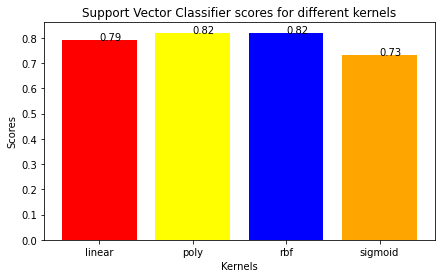

In [ ]:
# colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.figure(figsize=(7,4))
plt.bar(kernels, svc_scores,color=['red', 'yellow', 'blue', 'orange'])
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

Precision Score :  0.9058823529411765
Recall Score :  0.7204678362573099
[[796  64]
 [239 616]]


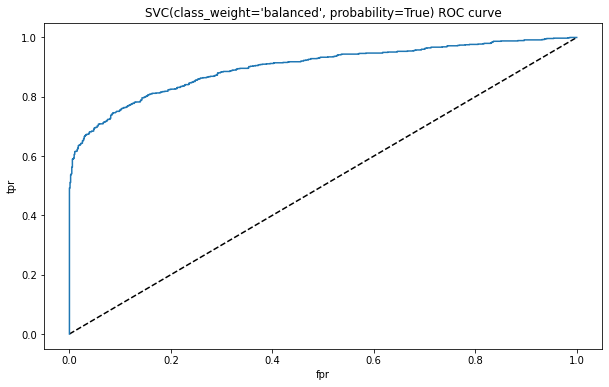

ROC-AUC score: 0.8230246158030735
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       860
           1       0.91      0.72      0.80       855

    accuracy                           0.82      1715
   macro avg       0.84      0.82      0.82      1715
weighted avg       0.84      0.82      0.82      1715



In [ ]:
# we can add class_weight='balanced' to add penalize mistake
svc_model = SVC(kernel='rbf',class_weight='balanced', probability=True)

model_implement_smote_data(svc_model,x_train,x_test,y_train,y_test)


Precision Score :  0.3007518796992481
Recall Score :  0.48484848484848486
[[660 186]
 [ 85  80]]


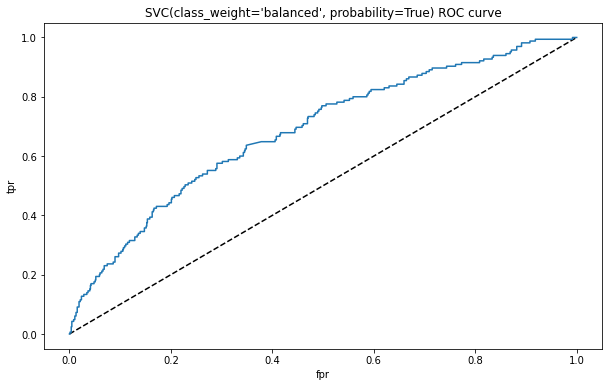

ROC-AUC score: 0.632495164410058
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       846
           1       0.30      0.48      0.37       165

    accuracy                           0.73      1011
   macro avg       0.59      0.63      0.60      1011
weighted avg       0.79      0.73      0.75      1011



In [ ]:
model_implement_actual_data(svc_model,X_test,Y_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

I have used Support Vector Classifier(SVC) to predict whether patient is having a risk of CHD or not.

On balanced data got from Smote technique, I applied SVC algorithm on training data for different kernels and got that for the testing data, highest AUC-ROC value is for the rbf kernel (roc_auc_score=0.82). 

I applied kNN for k = 2 on actual testing data and got following results :

**For the  actual testing data**, 

ROC-AUC score: 0.82

Precision Score :  0.30

Recall Score :  0.48

f1-score : 0.37 


I have not got good results, so improving by using hyperparameter tuning.  





In [ ]:
# Visualizing evaluation Metric Score chart
eval_metric_chart(svc_model,X_train,X_test,Y_train,Y_test,metrics_df)

                                       Model_Name   ROC_AUC    Recall  \
0  SVC(class_weight='balanced', probability=True)  0.632495  0.484848   

   Precision  
0   0.300752  


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

Precision Score :  0.9085631349782293
Recall Score :  0.7321637426900585
[[797  63]
 [229 626]]


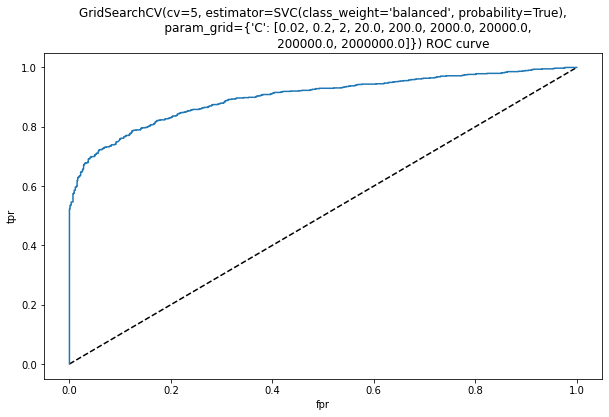

ROC-AUC score: 0.8294539643682851
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       860
           1       0.91      0.73      0.81       855

    accuracy                           0.83      1715
   macro avg       0.84      0.83      0.83      1715
weighted avg       0.84      0.83      0.83      1715

The best values of hyperparameters are found out to be : {'C': 2}


In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# Predict on the model
# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'C':[2e-2,2e-1,2,2e1,2e2,2e3,2e4,2e5,2e6]}

svc_ = SVC(kernel='rbf',class_weight='balanced', probability=True)

svc_hyp= GridSearchCV(svc_,param_grid,cv=5)

model_implement_smote_data(svc_hyp,x_train,x_test,y_train,y_test)

print("The best values of hyperparameters are found out to be :" ,svc_hyp.best_params_)

Precision Score :  0.29276315789473684
Recall Score :  0.5393939393939394
[[631 215]
 [ 76  89]]


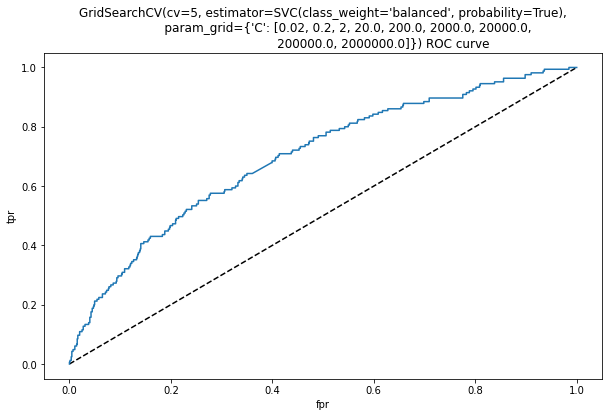

ROC-AUC score: 0.642628411777348
              precision    recall  f1-score   support

           0       0.89      0.75      0.81       846
           1       0.29      0.54      0.38       165

    accuracy                           0.71      1011
   macro avg       0.59      0.64      0.60      1011
weighted avg       0.79      0.71      0.74      1011



In [ ]:
model_implement_actual_data(svc_hyp,X_test,Y_test)

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

I have used Grid Search CV as hyperparameter optimization technique and got best parameter as C = 2  and for this following are the results : 

**For the actual testing data**, 

ROC-AUC score: 0.64

Precision Score :  0.29

Recall Score :  0.54

f1-score : 0.38







#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

The very simple metric to measure classification is basic accuracy i.e. ratio of correct predictions to the total number of samples in dataset. However, in the case of imbalanced classes this metric can be misguiding, as high metrics doesn’t show prediction capacity for the minority class. You may have 99% accuracy but still lousy prediction capacity on the class you are truly interested in (i.e. anomaly detection where anomalies are rare classes in a dataset). To gain more understanding for the current model predictive ability let’s start from the four possible cases of sample to be classified

True Positive (TP)— sample’s label is positive and it is classified as positive.

True Negative (TN) — sample’s label is negative and it is classified as negative.

False Positive (FP)— sample’s label is negative, but it is classified as positive.

False Negative (FN)— sample’s label is positive, but it is classified as negative.

Based on these four quantities we can derive following metrics for imbalanced classes :

**Recall (True Positive Rate or Sensitivity)**

Recall metric shows how many relevant samples are selected, which means how well our model can predict all the interested samples in our dataset.

Recall = TP / ( TP + FN )

**Precision**

Precision metric tells us how many predicted samples are relevant i.e. our mistakes into classifying sample as a correct one if it’s not true.

Precision = TP / ( TP + FP )

**F1-score**

F1 metric is the harmonic average of the precision and recall and calculated as

F1-score = ( 2 * Precision * Recall ) / ( Precision + Recall )

This metric is a good choice for the imbalanced classification scenario. The range of F1 is in [0, 1], where 1 is perfect classification and 0 is total failure.


**ROC-AUC **

ROC stands for Receiver Operating Characteristic and initially was designed as metric for distinguishing noise from not noise. ROC is created by plotting the fraction of True Positive Rate (on the y axis) vs the False Positive Rate (on the x axis). The ROC-AUC metric is showed an area under the curve obtained by ROC curve. AUC is a common abbreviation for Area Under the Receiver Operating Characteristic Curve (ROC AUC). It’s a metric used to assess the performance of classification machine learning models.

The ROC is a graph which maps the relationship between true positive rate (TPR) and the false positive rate (FPR), showing the TPR that we can expect to receive for a given trade-off with FPR. The AUC score is the area under this ROC curve, meaning that the resulting score represents in broad terms the model's ability to predict classes correctly.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

Precision Score :  0.8081264108352144
Recall Score :  0.8374269005847953
[[690 170]
 [139 716]]


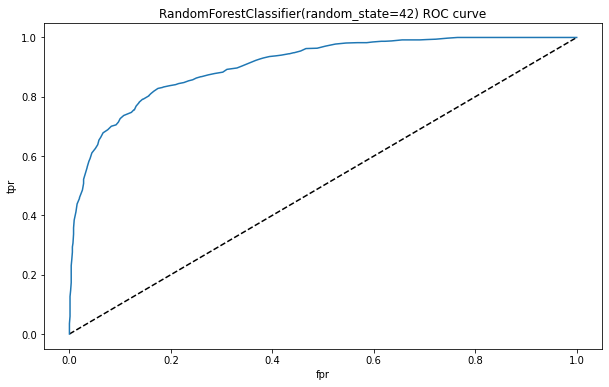

ROC-AUC score: 0.8198762409900722
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       860
           1       0.81      0.84      0.82       855

    accuracy                           0.82      1715
   macro avg       0.82      0.82      0.82      1715
weighted avg       0.82      0.82      0.82      1715



In [102]:
# using Random Forest Classifier
from xgboost import XGBClassifier
xgb = XGBClassifier()

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)

model_implement_smote_data(rfc,x_train,x_test,y_train,y_test)

Precision Score :  0.3325062034739454
Recall Score :  0.8121212121212121
[[577 269]
 [ 31 134]]


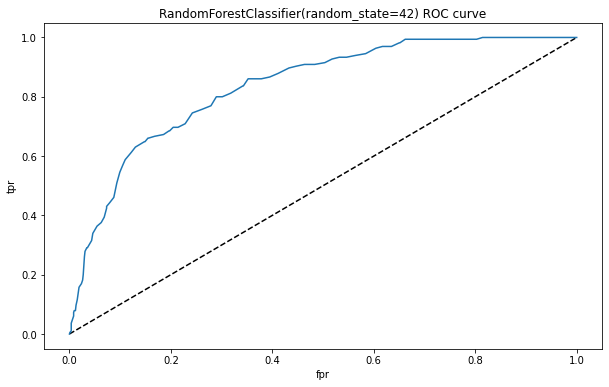

ROC-AUC score: 0.747077154523963
              precision    recall  f1-score   support

           0       0.95      0.68      0.79       846
           1       0.33      0.81      0.47       165

    accuracy                           0.70      1011
   macro avg       0.64      0.75      0.63      1011
weighted avg       0.85      0.70      0.74      1011



In [103]:
model_implement_actual_data(rfc,X_test,Y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


I have used Random Forest Classifier (RFC) to predict whether patient is having a risk of CHD or not.

On balanced data got from Smote technique, I fitted RFC algorithm on training data and predicted on the actual testing data, got following results :

**For the  actual testing data**, 

ROC-AUC score: 0.72

Precision Score :  0.35

Recall Score :  0.70

f1-score : 0.46


I got quite acceptable results and now improving by using hyperparameter tuning.  





In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

Precision Score :  0.9133858267716536
Recall Score :  0.8140350877192982
[[794  66]
 [159 696]]


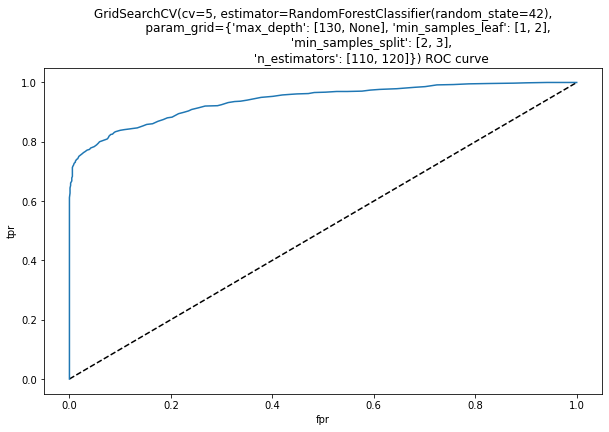

ROC-AUC score: 0.8686454508363932
              precision    recall  f1-score   support

           0       0.83      0.92      0.88       860
           1       0.91      0.81      0.86       855

    accuracy                           0.87      1715
   macro avg       0.87      0.87      0.87      1715
weighted avg       0.87      0.87      0.87      1715

The best values of hyperparameters are found out to be : {'max_depth': 130, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 110}


In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm
rfc_= RandomForestClassifier(random_state=42)
param_dict_ = {'max_depth' : [130,None],
                'min_samples_leaf': [1,2],
                'min_samples_split' : [2,3],
                'n_estimators': [110,120]}

rfc_hyp = GridSearchCV(rfc_,param_dict_ , cv = 5)


model_implement_smote_data(rfc_hyp,x_train,x_test,y_train,y_test)

print("The best values of hyperparameters are found out to be :" ,rfc_hyp.best_params_)


Precision Score :  0.3489736070381232
Recall Score :  0.7212121212121212
[[624 222]
 [ 46 119]]


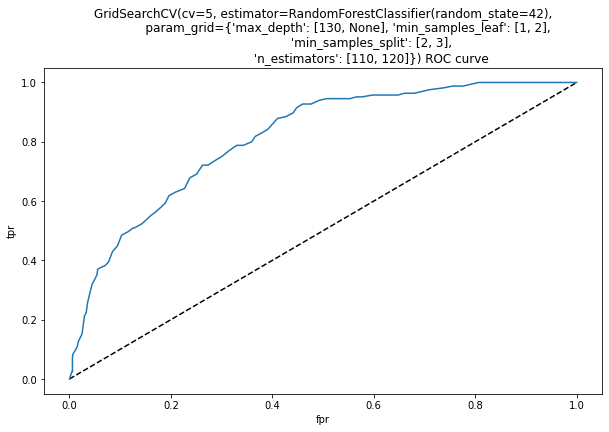

ROC-AUC score: 0.7294003868471953
              precision    recall  f1-score   support

           0       0.93      0.74      0.82       846
           1       0.35      0.72      0.47       165

    accuracy                           0.73      1011
   macro avg       0.64      0.73      0.65      1011
weighted avg       0.84      0.73      0.77      1011



In [ ]:
model_implement_actual_data(rfc_hyp,X_test,Y_test)

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

I have used Grid Search CV as hyperparameter optimization technique and got best parameter as 

max_depth : 130, min_samples_leaf : 1, min_samples_split : 2,   n_estimators : 110 and for this following are the results : 


**For the  actual testing data**, 

ROC-AUC score: 0.73

Precision Score :  0.35

Recall Score :  0.72

f1-score : 0.47


 




#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

The very simple metric to measure classification is basic accuracy i.e. ratio of correct predictions to the total number of samples in dataset. However, in the case of imbalanced classes this metric can be misguiding, as high metrics doesn’t show prediction capacity for the minority class. You may have 99% accuracy but still lousy prediction capacity on the class you are truly interested in (i.e. anomaly detection where anomalies are rare classes in a dataset). To gain more understanding for the current model predictive ability let’s start from the four possible cases of sample to be classified

True Positive (TP)— sample’s label is positive and it is classified as positive.

True Negative (TN) — sample’s label is negative and it is classified as negative.

False Positive (FP)— sample’s label is negative, but it is classified as positive.

False Negative (FN)— sample’s label is positive, but it is classified as negative.

Based on these four quantities we can derive following metrics for imbalanced classes :

**Recall (True Positive Rate or Sensitivity)**

Recall metric shows how many relevant samples are selected, which means how well our model can predict all the interested samples in our dataset.

Recall = TP / ( TP + FN )

**Precision**

Precision metric tells us how many predicted samples are relevant i.e. our mistakes into classifying sample as a correct one if it’s not true.

Precision = TP / ( TP + FP )

**F1-score**

F1 metric is the harmonic average of the precision and recall and calculated as

F1-score = ( 2 * Precision * Recall ) / ( Precision + Recall )

This metric is a good choice for the imbalanced classification scenario. The range of F1 is in [0, 1], where 1 is perfect classification and 0 is total failure.


**ROC-AUC **

ROC stands for Receiver Operating Characteristic and initially was designed as metric for distinguishing noise from not noise. ROC is created by plotting the fraction of True Positive Rate (on the y axis) vs the False Positive Rate (on the x axis). The ROC-AUC metric is showed an area under the curve obtained by ROC curve. AUC is a common abbreviation for Area Under the Receiver Operating Characteristic Curve (ROC AUC). It’s a metric used to assess the performance of classification machine learning models.

The ROC is a graph which maps the relationship between true positive rate (TPR) and the false positive rate (FPR), showing the TPR that we can expect to receive for a given trade-off with FPR. The AUC score is the area under this ROC curve, meaning that the resulting score represents in broad terms the model's ability to predict classes correctly.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The very simple metric to measure classification is basic accuracy i.e. ratio of correct predictions to the total number of samples in dataset. However, in the case of imbalanced classes this metric can be misguiding, as high metrics doesn’t show prediction capacity for the minority class. You may have 99% accuracy but still lousy prediction capacity on the class you are truly interested in (i.e. anomaly detection where anomalies are rare classes in a dataset). To gain more understanding for the current model predictive ability let’s start from the four possible cases of sample to be classified

True Positive (TP)— sample’s label is positive and it is classified as positive.

True Negative (TN) — sample’s label is negative and it is classified as negative.

False Positive (FP)— sample’s label is negative, but it is classified as positive.

False Negative (FN)— sample’s label is positive, but it is classified as negative.

Based on these four quantities we can derive following metrics for imbalanced classes :

**Recall (True Positive Rate or Sensitivity)**

Recall metric shows how many relevant samples are selected, which means how well our model can predict all the interested samples in our dataset.

Recall = TP / ( TP + FN )

**Precision**

Precision metric tells us how many predicted samples are relevant i.e. our mistakes into classifying sample as a correct one if it’s not true.

Precision = TP / ( TP + FP )

**F1-score**

F1 metric is the harmonic average of the precision and recall and calculated as

F1-score = ( 2 * Precision * Recall ) / ( Precision + Recall )

This metric is a good choice for the imbalanced classification scenario. The range of F1 is in [0, 1], where 1 is perfect classification and 0 is total failure.


**ROC-AUC **

ROC stands for Receiver Operating Characteristic and initially was designed as metric for distinguishing noise from not noise. ROC is created by plotting the fraction of True Positive Rate (on the y axis) vs the False Positive Rate (on the x axis). The ROC-AUC metric is showed an area under the curve obtained by ROC curve. AUC is a common abbreviation for Area Under the Receiver Operating Characteristic Curve (ROC AUC). It’s a metric used to assess the performance of classification machine learning models.

The ROC is a graph which maps the relationship between true positive rate (TPR) and the false positive rate (FPR), showing the TPR that we can expect to receive for a given trade-off with FPR. The AUC score is the area under this ROC curve, meaning that the resulting score represents in broad terms the model's ability to predict classes correctly.


**Evaluation Metrics Considered**

Although widely used, the ROC AUC is not without problems. For imbalanced classification with a severe skew and few examples of the minority class, the ROC AUC can be misleading. This is because a small number of correct or incorrect predictions can result in a large change in the ROC Curve or ROC AUC score.

The F1 score is defined as the harmonic mean of precision and recall.The F1 score becomes especially valuable when working on classification models in which your data set is imbalanced.

You have seen that the F1 score combines precision and recall into a single metric. It keeps the balance between Precision and Recall. Also this makes it easy to use in grid search or automated optimization.

We can infer about Precision and Recall values from the F1 score values as follows :

1) When F1 score is low, both Precision and Recall are low.

2) When F1 score is high, both Precision and Recall are high.

3) When F1 score is moderate, one of them is high and other is low.

So, F1 score is the best evaluation metric to consider for an imbalanced classification problem.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have chosen Random Forest Classifier hyperparameter tuned by Grid Search CV as my final model.

Random forest is an ideal algorithm to deal with the extreme imbalance owing to two main reasons :

Firstly, the ability to incorporate class weights into the random forest classifier makes it cost-sensitive; hence it penalizes misclassifying the minority class. 

Secondly, it combines the sampling technique and ensemble learning, therefore, downsampling the majority class and growing trees on a more balanced dataset.

There are several other advantages of using a random forest classifier with imbalanced datasets. The algorithm is a strong modelling technique and is much more sturdy than a single decision tree. The aggregation of several trees limits the possibility of overfitting and miscalculations due to bias and, in return, capitulates handy results.

Random forest classifier handles the missing values and maintains accuracy for missing data when a large proportion of the data is missing. It has the power to control large data sets with higher dimensionality.

Evaluation Metrics for the Random Forest Classifier Hyperparameter Tuned by Grid Search are as follows :

**For the  actual testing data**, 

ROC-AUC score: 0.73

Precision Score :  0.35

Recall Score :  0.72

f1-score : 0.47



### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [59]:
# Installing lime
%pip install lime

# importing lime 
import lime
import lime.lime_tabular

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 19.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=a0925e4aa9d897fa930678bf7809bac33d0bac5a497a27a7923d194d032e928b
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [117]:
# LIME has one explainer for all the models
# Creating explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(),
                                                  class_names=['TenYearCHD'], verbose=True, mode='classification')

In [124]:
# Choose the 5th instance of test data and use it to predict the results
j = 5
exp = explainer.explain_instance(X_test.values[j], rfc.predict_proba,num_features=5)

Intercept 0.5526469587216031
Prediction_local [0.11592677]
Right: 0.33


In [119]:
# Actual value of 5th instance of test data
Y_test.values[5]

0

In [127]:
# Values of nd instance of particular columns
cardio_risk_df.loc[2362,['diabetes','glucose','age','totChol','sysBP','diaBP','prevalentHyp','is_smoking','TenYearCHD']]

diabetes            0
glucose          58.0
age                39
totChol         229.0
sysBP           125.0
diaBP            80.0
prevalentHyp        0
is_smoking         NO
TenYearCHD          0
Name: 2362, dtype: object

In [125]:
# Show the predictions

exp.show_in_notebook(show_table=True)

Here’s plenty of information that LIME outputs give. Let’s go step by step and interpret what it’s trying to convey.

First, we see three values just above the visualizations:

**Right**:  This denotes the prediction given by our prediction model(random forest classifier) for the given test vector.

**Prediction_local**:  This denotes the value outputted by a linear model trained on the perturbed samples(obtained by sampling around the test vector following a normal distribution) and using only the top k features outputted by LIME.

**Intercept:** The intercept is the constant part of the prediction given by the above linear model’s prediction for the given test vector.


Coming to the visualizations, we can see the colors blue and orange, depicting negative and positive associations with the sales respectively.

We can conclude from the visualization (in the centre) about the sales for the 5th instance of the test data(depicted by a orange bar on the left) which can be explained by 5 most important features as follows:

1) The Diabetes_grade feature having highest weight means the most important feature in predicting the risk of CHD. It can be seen that it has negative association with risk of CHD i.e does not contributes towards risk of CHD due to the value of Normal (  glucose level of 58 and not having diabetes).

2) The Age feature having the 2nd highest weight means the 2nd most important feature in predicting the risk of CHD. It has negative association i.e not contributing towards risk of CHD due to age of 39 which is not prone to risk of CHD.

3) The TotChol feature has a negative association i.e not contributing towards risk of CHD but the value of cholestrol level is not low ( having value of 229 ).
 
4) The Hypertension and Smoking Factor features both have negative association with risk of CHD i.e not contributing towards risk of CHD because patient has no prevalent hypertension and the values of sysBP and diaBP - 125 and 80 respectively and also it does not smoke. 

From the above points, we can conclude that for the given 5th instance of the test data, all the 5 most important features - Diabetes_grade, Age, TotChol, Hypertension and Smoking Factor have negative association with the risk of CHD. This results in the value of Ten Year CHD is 0 i.e patient does not has the risk of Coronary Heart Disease.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***